In [1]:
%load_ext autoreload
%autoreload 2

from jordan_wigner import jw_majoranas
from electronic_hamiltonian import quadratic_terms
from qiskit.quantum_info import PauliList
from tableau import spread_node, spread_node_slice, anticommutation_matrix
import random
from cost_functions import weight, quadratic_term_mean_weight
from annealing import anneal
import matplotlib.pyplot as plt

In [2]:
N = 10

x, z = jw_majoranas(N)

paulis = PauliList.from_symplectic(z, x)

print("Majorana Operators:", paulis)

x_terms, z_terms = quadratic_terms(x, z, N)

quadratic_terms_paulis = PauliList.from_symplectic(z_terms, x_terms)

print("Quadratic Hamiltonian Terms:", quadratic_terms_paulis)

print(f"Average Weight: {weight(x, z)}")

Majorana Operators: ['IIIIIIIIIX', 'IIIIIIIIXZ', 'IIIIIIIXZZ', 'IIIIIIXZZZ', 'IIIIIXZZZZ',
 'IIIIXZZZZZ', 'IIIXZZZZZZ', 'IIXZZZZZZZ', 'IXZZZZZZZZ', 'XZZZZZZZZZ',
 'IIIIIIIIIY', 'IIIIIIIIYZ', 'IIIIIIIYZZ', 'IIIIIIYZZZ', 'IIIIIYZZZZ',
 'IIIIYZZZZZ', 'IIIYZZZZZZ', 'IIYZZZZZZZ', 'IYZZZZZZZZ', 'YZZZZZZZZZ']
Quadratic Hamiltonian Terms: ['IIIIIIIIXY', 'IIIIIIIXZY', 'IIIIIIXZZY', 'IIIIIXZZZY', 'IIIIXZZZZY',
 'IIIXZZZZZY', 'IIXZZZZZZY', 'IXZZZZZZZY', 'XZZZZZZZZY', 'IIIIIIIXYI',
 'IIIIIIXZYI', 'IIIIIXZZYI', 'IIIIXZZZYI', 'IIIXZZZZYI', 'IIXZZZZZYI',
 'IXZZZZZZYI', 'XZZZZZZZYI', 'IIIIIIXYII', 'IIIIIXZYII', 'IIIIXZZYII',
 'IIIXZZZYII', 'IIXZZZZYII', 'IXZZZZZYII', 'XZZZZZZYII', 'IIIIIXYIII',
 'IIIIXZYIII', 'IIIXZZYIII', 'IIXZZZYIII', 'IXZZZZYIII', 'XZZZZZYIII',
 'IIIIXYIIII', 'IIIXZYIIII', 'IIXZZYIIII', 'IXZZZYIIII', 'XZZZZYIIII',
 'IIIXYIIIII', 'IIXZYIIIII', 'IXZZYIIIII', 'XZZZYIIIII', 'IIXYIIIIII',
 'IXZYIIIIII', 'XZZYIIIIII', 'IXYIIIIIII', 'XZYIIIIIII', 'XYIIIIIIII']
Average Weight: 110


T0 = 20
Iteration 10 4.644444444444445
Iteration 23 4.511111111111111
Iteration 29 4.355555555555555
Iteration 41 4.311111111111111
Iteration 52 4.133333333333334
Iteration 72 4.044444444444444
Iteration 75 3.8666666666666667
Iteration 76 3.466666666666667
Iteration 1445 3.088888888888889
Iteration 3754 2.977777777777778
Iteration 24792 2.7777777777777777
Iteration 36365 2.688888888888889


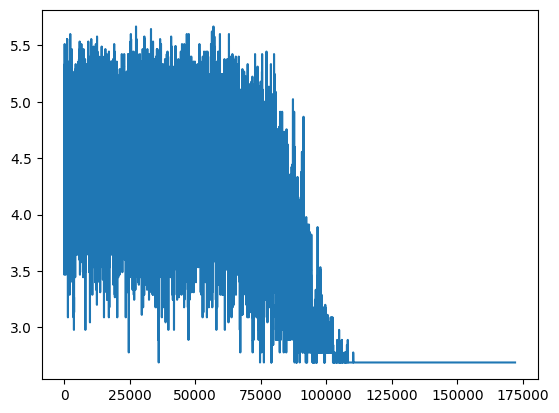

In [3]:
x, z, energies, energy_opt = anneal(x, z, explore=spread_node, energy=quadratic_term_mean_weight, cooling_rate=0.99995)

paulis = PauliList.from_symplectic(z, x)

plt.plot(energies)

In [9]:
anticommutation_matrix(x, z)

array([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1,